Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.8637 - loss: 0.4458 - val_accuracy: 0.9818 - val_loss: 0.0614
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9793 - loss: 0.0686 - val_accuracy: 0.9868 - val_loss: 0.0468
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.9871 - loss: 0.0420 - val_accuracy: 0.9864 - val_loss: 0.0490
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 78ms/step - accuracy: 0.9898 - loss: 0.0337 - val_accuracy: 0.9882 - val_loss: 0.0414
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 76ms/step - accuracy: 0.9920 - loss: 0.0242 - val_accuracy: 0.9867 - val_loss: 0.0469
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - accuracy: 0.9933 - loss: 0.0202 - val_accuracy: 0.9889 - val_loss: 0.0398
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 31s 81ms/step - accuracy: 0.9943 - loss: 0.0173 - val_accuracy: 0.9884 - val_loss: 0.0413
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - accuracy: 0.9942 - loss: 0.0162 - 

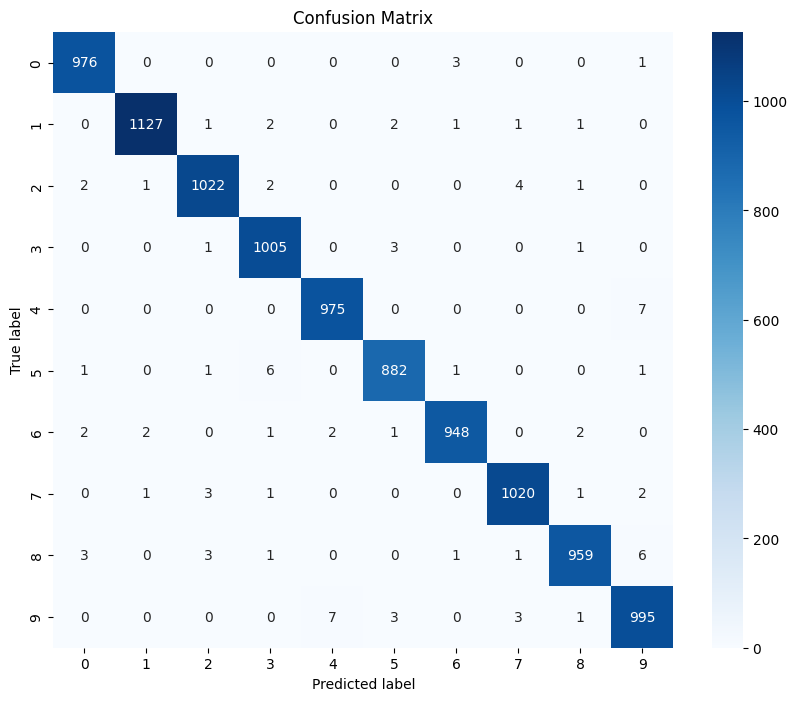

In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and preprocess the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to fit the CNN input (28x28 images with 1 channel)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 2: Define the CNN model
input_layer = Input(shape=(28, 28, 1))

# Convolutional Layers
conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(conv1)

# Pooling Layer
pool = MaxPooling2D(pool_size=(2, 2))(conv2)

# Dropout for regularization
dropout = Dropout(0.5)(pool)

# Flatten the output from the fully connected layer
flatten = Flatten()(dropout)

# Fully Connected Layers
dense1 = Dense(128, activation='relu')(flatten)
output_layer = Dense(10, activation='softmax')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Step 3: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Step 5: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

# Step 6: Confusion Matrix
# Predict the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

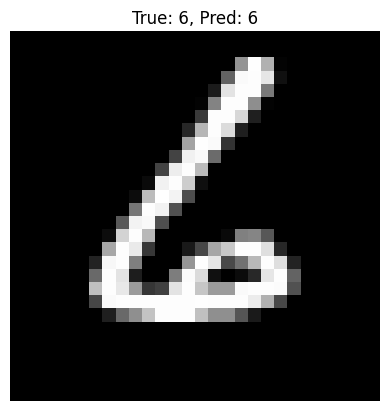

In [2]:
# Pick one random test sample
idx = np.random.randint(len(x_test))
img = x_test[idx].reshape(28, 28)

# Show image
plt.imshow(img, cmap='gray')
plt.title(f"True: {y_true_classes[idx]}, Pred: {y_pred_classes[idx]}")
plt.axis('off')
plt.show()
